<a href="https://colab.research.google.com/github/EronDS/DataScience/blob/main/PopulationGrowth/PopulationGrowthAndFoodConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import seaborn as sns 
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')


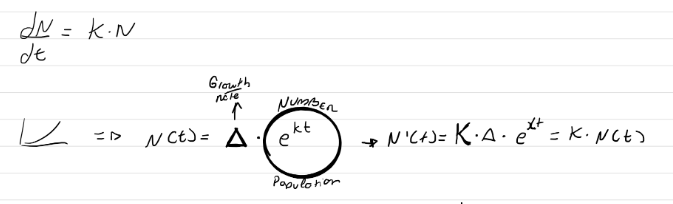

In [2]:
def nt(A = 100, e = 2.78, k = 0.001 , tmin = 0, tmax = 1000):
  timesteps = np.linspace(tmin,tmax,tmax)
  dndt = []
  for t in range(tmin,tmax):
    dndt.append(A * e **(k * t))
  to = Doubling_time(k)

  plt.figure(figsize = (10,5))
  sns.lineplot(x = timesteps , y = dndt, 
               linewidth = 4, color = 'skyblue')
  plt.title('Population Growth')
  plt.axvline(to, color = 'red' , 
              linestyle = 'dashed', label ='Doubling Time')
  plt.xlabel('(t)', fontsize = 12 , weight = 'bold')
  plt.legend()
  plt.show()


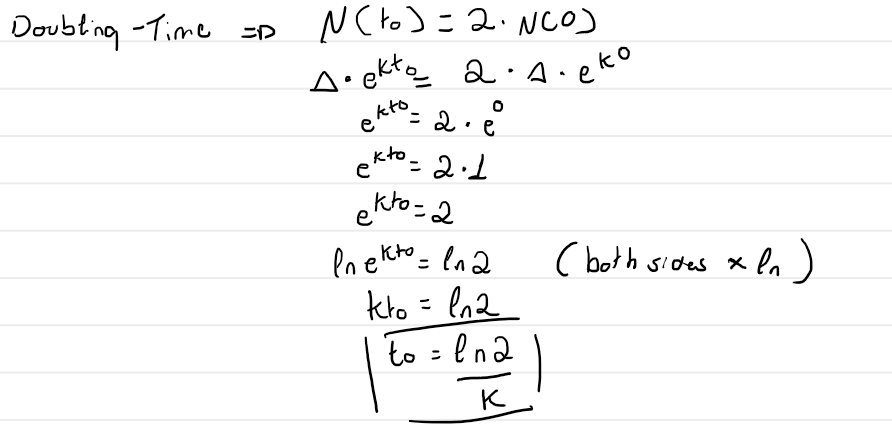

In [3]:
def Doubling_time(K):
  to = math.log(2) / K
  return to


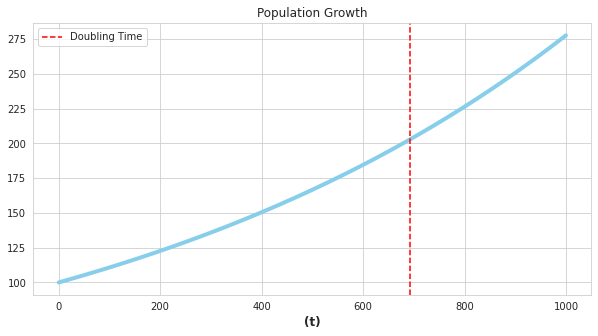

In [4]:
nt()

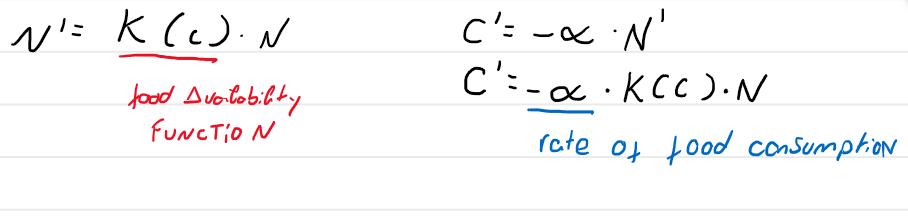


In [5]:
def FoodConsumption(A = 100, e = 2.78, k = 0.00125 , tmin = 0, tmax = 1000, alpha = .0025):
  timesteps = np.linspace(tmin,tmax,1000)
  dndt = []
  food = []
  for t in range(tmin,tmax):
    Nt = A * e **(k * t)
    fd =  100 - 125 * alpha * Nt
    threshhold = []
    if fd < 25:
      Nt = A * e **(-0.0015 * t)
      threshhold.append(t)
    if fd < 0:
      fd = 0
      
    dndt.append(Nt)
    food.append(fd)
    

  to = Doubling_time(k)
  plt.figure(figsize = (20,10))
  plt.subplot(211)
  sns.lineplot(x = timesteps , y = dndt, 
               linewidth = 4, color = 'skyblue')
  plt.title('Population Growth')
  plt.axvline(to, color = 'red' , 
              linestyle = 'dashed', label ='Doubling Time')
  plt.axvline(to + 132,
              color = 'darkblue' , label = 'Increased Competition for Food Within the Species Population')
  plt.ylabel([' '])
  plt.legend(fontsize = 16)
  plt.xticks([], [])

  print('  ')
  print('   ')
  plt.subplot(212)
  sns.lineplot(x = timesteps, y = food, linewidth = 3, color = 'orange')
  plt.title('Food Availability (%)')
  #plt.axvline(threshhold[0], color = 'salmon',
  #            linestyle = '-', label = 'Food Limitation' )
  plt.legend()
  plt.xticks([], [])
  plt.show()


No handles with labels found to put in legend.


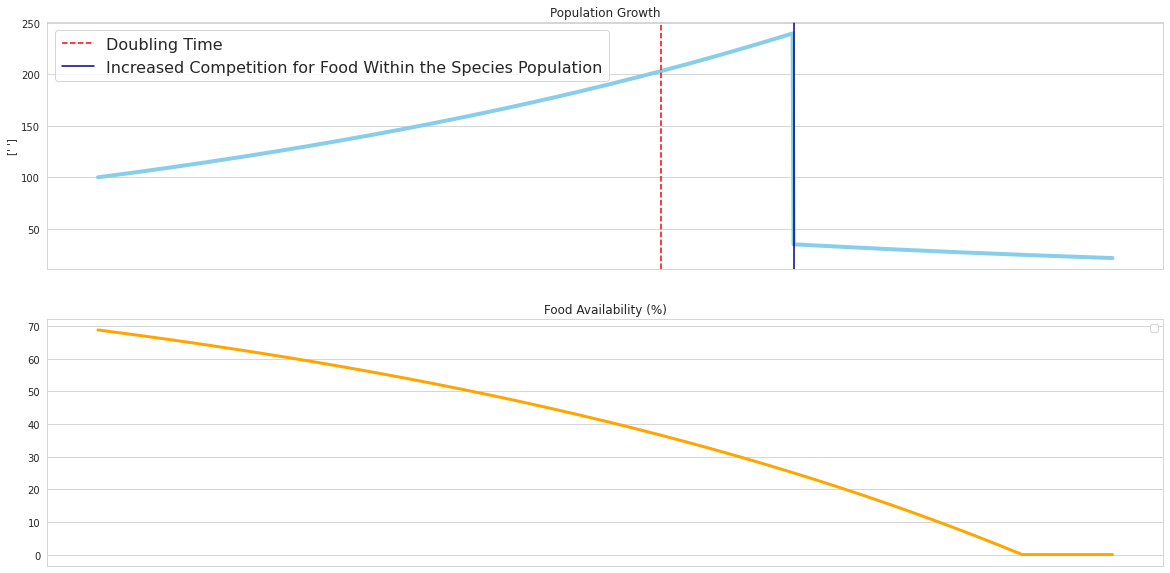

In [6]:
FoodConsumption()